In [ ]:
"""
#Program developed by Raul Ramirez Summer 2019
#Monterrey NL rramirez@tec.mx
#based on multiple sources
"""

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn

In [2]:
#Read data
candidates = pd.read_csv('https://raw.githubusercontent.com/rramirez-tec-mx/data/main/candidates.csv')
print("Shape",candidates.shape)

Shape (40, 4)


In [6]:
#Read data
#candidates = pd.read_csv('candidates.csv')
#print("Shape",candidates.shape)

In [7]:
candidates.head()

,gmat,gpa,work_experience,admitted
0,708,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [8]:
#Are classes balanced?
candidates['admitted'].value_counts()

1    21
0    19
Name: admitted, dtype: int64

In [11]:
# Drop all empty lines
candidates=candidates.dropna()

In [12]:
print("Shape",candidates.shape)

Shape (40, 4)


In [13]:
candidates=candidates[pd.to_numeric(candidates['gmat'], errors='coerce').notnull()]

In [14]:
print("Shape",candidates.shape)

Shape (40, 4)


In [15]:
header_row=candidates.columns.values
print(header_row)

['gmat' 'gpa' 'work_experience' 'admitted']


In [16]:
#Separate dependent and independent variables
y = candidates['admitted']
X=candidates.drop(['admitted'],axis=1)

In [17]:
#Separate dependent and independent variables
X = candidates[['gmat', 'gpa','work_experience']]
y = candidates['admitted']

In [18]:
X.head(10)

,gmat,gpa,work_experience
0,708,4.0,3
1,750,3.9,4
2,690,3.3,3
3,710,3.7,5
4,680,3.9,4
5,730,3.7,6
6,690,2.3,1
7,720,3.3,4
8,740,3.3,5
9,690,1.7,1


In [19]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    0
7    1
8    1
9    0
Name: admitted, dtype: int64

In [20]:
#Separate train and test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
#Fit classifier with train data
logistic_regression= LogisticRegression(max_iter=1000,n_jobs=8,verbose=1)
logistic_regression.fit(X_train,y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:    2.0s finished


LogisticRegression(max_iter=1000, n_jobs=8, verbose=1)

In [22]:
#Predict test data
y_pred=logistic_regression.predict(X_test)

In [23]:
print(y_pred)

[0 0 1 1 0 0 1 1]


In [24]:
logistic_regression.score(X_test,y_test)

1.0

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
#Get right and wrong classifications
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[4 0]
 [0 4]]


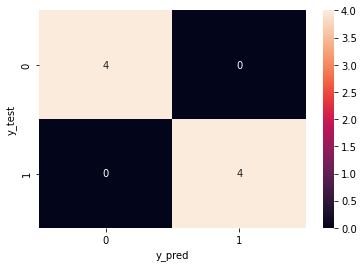

In [27]:
#Pretty print confusion matrix
cm2 = pd.crosstab(y_test,y_pred,rownames=['y_test'],colnames=['y_pred'])
sn.heatmap(cm2,annot=True)
#print(cm2)

In [28]:
tn, fp, fn, tp

(4, 0, 0, 4)

In [29]:
#Get performance measures
from sklearn.metrics import classification_report

In [30]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [31]:
recall=tp/(tp+fn)
print("Recall ",recall)
print("Likelihood Ratio ",recall/(1-recall))

Recall  1.0
Likelihood Ratio  inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Accuracy= 1.0
